# Name:- Parshwa Shah
# Experiment No.:- 3
# Roll No.- 34
# UID:- 2019230071
# Batch:- B

<h2>Aim:- To implement and use Naive Bayes and Linear Discriminant Analysis using Python Platform </h2>

<h3> Import the libraries </h3>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<h3> Fetch zip file of sms spam dataset </h3>

In [6]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip -o sms.zip 

In [7]:
!unzip smsspamcollection.zip

Archive:  smsspamcollection.zip
  inflating: SMSSpamCollection       
  inflating: readme                  


<h3> Import the dataset </h3>

In [8]:
dataset = pd.read_table('SMSSpamCollection',
                   sep='\t', 
                   header=None, 
                   names=['label', 'sms_message'])

In [9]:
dataset


,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<h3> Dataset message label counts </h3>

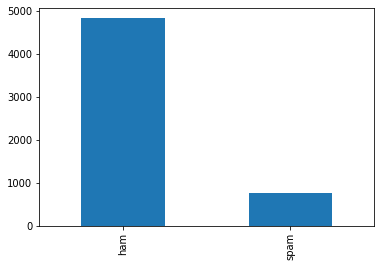

In [10]:
dataset['label'].value_counts().plot(kind='bar')

In [11]:
dataset.describe()

,label,sms_message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


<h3> Inference </h3>
<h3> Dataset is imbalanced as spam is minority class </h3>

In [12]:
dataset.loc[:,'label'] = dataset.label.map({'ham':0, 'spam':1})

In [13]:
dataset

,label,sms_message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


<h3> Import the Count Vectorizer for NLP </h3>

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

<h3> Split the dataset into 80% in training set and 20% in test set </h3>

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset['sms_message'], dataset['label'],test_size=0.20, random_state=1)

<h3> Fit Transform the Count Vectorizer </h3>

In [16]:
count_vector = CountVectorizer()

training_data = count_vector.fit_transform(X_train)

testing_data = count_vector.transform(X_test)

<h3> Calculate the sparsity of training data </h3>

In [18]:
from numpy import count_nonzero
sparsity = 1.0 - (training_data.count_nonzero() / float(training_data.toarray().size))
print('Training data Sparisity=',sparsity)

Training data Sparisity= 0.9982831363725709


<h3> Apply Naive Bayes classifier to training data </h3>

In [19]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(training_data.toarray(),y_train)


GaussianNB()

<h3> Apply classifier on test set </h3>

In [20]:
predictions = naive_bayes.predict(testing_data.toarray())

<h3> Print the Evaluation metrics </h3>

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions)))
print('Recall score: {}'.format(recall_score(y_test, predictions)))
print('F1 score: {}'.format(f1_score(y_test, predictions)))


Accuracy score: 0.9022421524663677
Precision score: 0.5791666666666667
Recall score: 0.9455782312925171
F1 score: 0.7183462532299743


<h3> Print the specificity and senstivity </h3>

In [22]:
from sklearn.metrics import confusion_matrix,classification_report
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)

In [23]:
print('Specificity=',specificity)
print('Sensitivity=',sensitivity)

Specificity= 0.8956611570247934
Sensitivity= 0.9455782312925171


<h3> Print the classification report </h3>

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       968
           1       0.58      0.95      0.72       147

    accuracy                           0.90      1115
   macro avg       0.79      0.92      0.83      1115
weighted avg       0.94      0.90      0.91      1115



<h3> Apply the Linear Discriminant Analysis </h3>

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=1)
X_train2 = lda.fit_transform(training_data.toarray(), y_train)
X_test2 = lda.transform(testing_data.toarray())

In [27]:
X_train2

array([[-9.80299489],
       [-9.60113619],
       [-9.80482069],
       ...,
       [-9.79613276],
       [62.95090526],
       [-6.64057057]])

<h3> Apply Naive Bayes after LDA </h3>

In [28]:
naive_bayes2 = GaussianNB()
naive_bayes2.fit(X_train2,y_train)

GaussianNB()

In [29]:
predictions2 = naive_bayes2.predict(X_test2)

<h3> Print the evaluation report and classification report </h3>

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       968
           1       0.54      0.61      0.57       147

    accuracy                           0.88      1115
   macro avg       0.74      0.76      0.75      1115
weighted avg       0.89      0.88      0.88      1115



In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions2)))
print('Precision score: {}'.format(precision_score(y_test, predictions2)))
print('Recall score: {}'.format(recall_score(y_test, predictions2)))
print('F1 score: {}'.format(f1_score(y_test, predictions2)))

Accuracy score: 0.8807174887892377
Precision score: 0.5426829268292683
Recall score: 0.6054421768707483
F1 score: 0.572347266881029


In [32]:
from sklearn.metrics import confusion_matrix,classification_report
tn, fp, fn, tp = confusion_matrix(y_test, predictions2).ravel()
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)

In [33]:
print('Specificity=',specificity)
print('Sensitivity=',sensitivity)

Specificity= 0.9225206611570248
Sensitivity= 0.6054421768707483


<h3> Apply Naive Bayes on Census Data </h3>

In [34]:
censusdata = pd.read_csv('census.csv')
censusdata

,age,work_class,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


<h3> Check for null values in dataset </h3>

In [35]:
censusdata.isna().sum()

age               0
work_class        0
final_weight      0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

<h3> Count the output variable instances </h3>

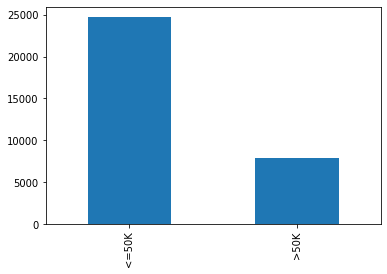

In [36]:
censusdata['income'].value_counts().plot(kind='bar')

<h3> Apply LabelEncoder on Categorical Variables </h3>

In [38]:
from sklearn import preprocessing
catvar = ['work_class', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country','income']
for feature in catvar:
        le = preprocessing.LabelEncoder()
        censusdata[feature] = le.fit_transform(censusdata[feature])

In [39]:
censusdata

,age,work_class,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


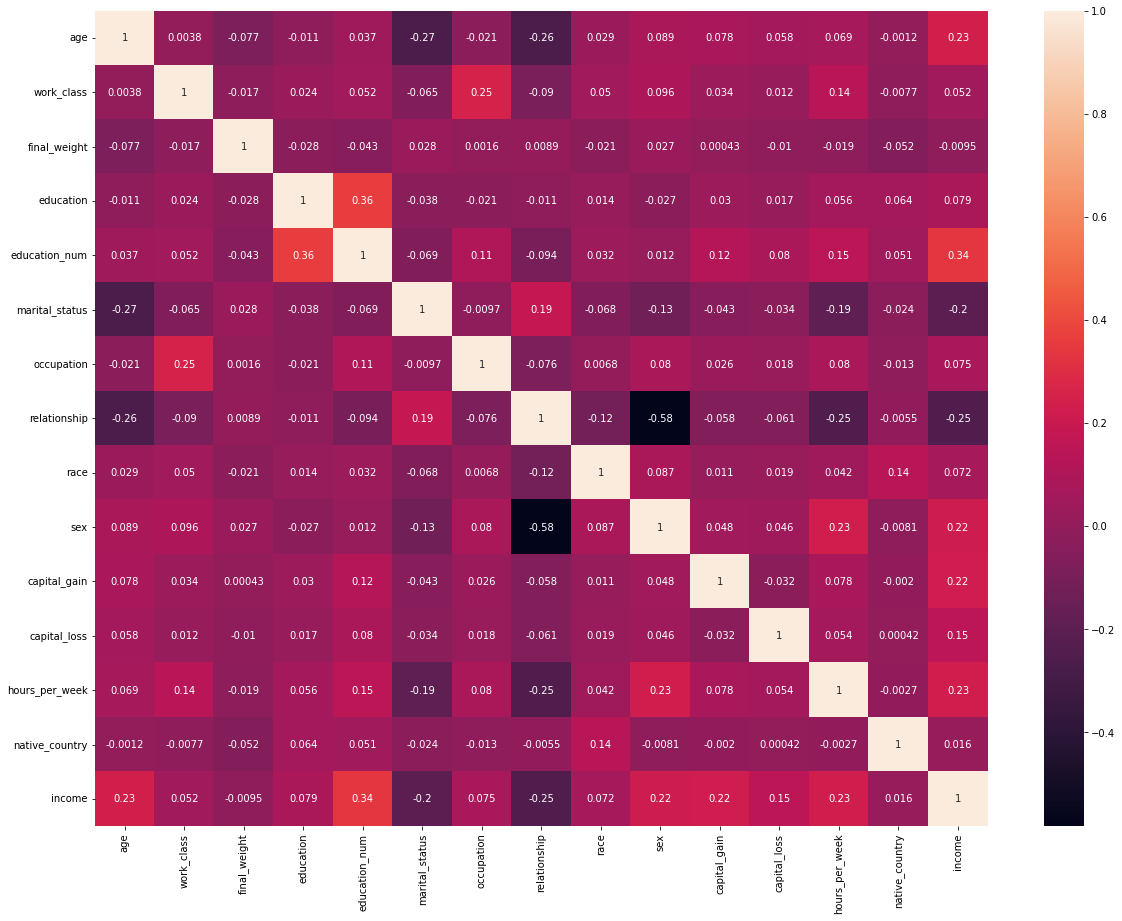

In [53]:
import seaborn as sns
train_corr=censusdata.corr()
plt.subplots(figsize=(20,15))
sns.heatmap(train_corr,annot=True)

<h3> Inference </h3>
<h3> 1) Income increases with age </h3>
<h3> 2) Income increases with educational qualification </h3>
<h3> 3) Income increases with hours_per_week </h3>
<h3> 4) Capital gain and capital loss positively correlated with income </h3>

<h3> Divide the dataset into X and y </h3>

In [40]:
X = censusdata.drop(['income'], axis=1)
y = censusdata['income']

In [41]:
X

,age,work_class,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,4,0,0,0,38,39
32557,40,4,154374,11,9,2,7,0,4,1,0,0,40,39
32558,58,4,151910,11,9,6,1,4,4,0,0,0,40,39
32559,22,4,201490,11,9,4,1,3,4,1,0,0,20,39


In [42]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64

<h3> Split the dataset into 80% training set and 20% test set  </h3>

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

<h3> Apply Standard Scaler on X </h3>

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [45]:
X_train

,age,work_class,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0.031369,1.460037,-0.013436,-2.404213,-1.198131,-0.403047,1.751742,-0.900628,0.393955,0.702795,-0.147254,-0.217992,-0.034534,0.293281
1,1.130910,1.460037,-0.802105,-0.335796,1.128838,-0.403047,-0.613712,-0.900628,0.393955,0.702795,-0.147254,-0.217992,-0.034534,0.293281
2,-0.481750,0.088486,-0.316470,0.181308,-0.422475,-0.403047,1.278651,-0.900628,0.393955,0.702795,-0.147254,4.493992,0.776074,0.293281
3,0.471185,1.460037,-1.489567,1.215517,-0.034647,0.926222,-0.377167,-0.278408,0.393955,0.702795,-0.147254,-0.217992,0.776074,0.293281
4,1.570726,0.088486,-0.408870,-2.662765,-1.585960,-0.403047,-0.140621,-0.900628,-1.956960,0.702795,-0.147254,-0.217992,-0.034534,0.293281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,-0.994869,-1.283065,3.064796,-0.335796,1.128838,0.926222,-1.323348,0.966032,-1.956960,-1.422890,-0.147254,-0.217992,-0.034534,0.293281
26044,-0.481750,0.088486,0.166806,-0.335796,1.128838,-0.403047,-0.613712,-0.900628,0.393955,0.702795,1.900304,-0.217992,0.370770,0.293281
26045,-0.848263,0.088486,-0.807324,-0.335796,1.128838,0.926222,0.095924,-0.278408,-3.132417,0.702795,-0.147254,-0.217992,-0.034534,-4.646388
26046,1.497423,2.145813,0.742840,0.181308,-0.422475,-0.403047,0.332469,-0.900628,0.393955,0.702795,-0.147254,-0.217992,-0.034534,0.293281


<h3> Apply Naive Bayes classifier on census data </h3>

In [46]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)

<h3> Print the evaluation metrics and classification report </h3>

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {}'.format(precision_score(y_test, y_pred)))
print('Recall score: {}'.format(recall_score(y_test, y_pred)))
print('F1 score: {}'.format(f1_score(y_test, y_pred)))

Accuracy score: 0.8106863196683556
Precision score: 0.6693333333333333
Recall score: 0.33759246805648957
F1 score: 0.44881537773804203


In [48]:
from sklearn.metrics import confusion_matrix,classification_report
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)

In [49]:
print('Specificity: {}'.format(specificity))
print('Sensitivity: {}'.format(sensitivity))

Specificity: 0.9506565857540787
Sensitivity: 0.33759246805648957


In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      5026
           1       0.67      0.34      0.45      1487

    accuracy                           0.81      6513
   macro avg       0.75      0.64      0.67      6513
weighted avg       0.79      0.81      0.79      6513



### Conclusion:-
### From this experiment, I understood natural language processing and its libraries. Also, I applied Naive Bayes classifier and Linear Discriminant Analysis on SMS Spam data. After that, I applied Naive Bayes classifier on census data. This product can be applied on census data and income classification can be done.